### Importing Necessory Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
pd.set_option('display.max_columns', None)

## Loading the data

In [6]:
ls

analysis_report_temp.ipynb  EDA.ipynb                  preprocessed_df.csv
data/                       Feature_engineering.ipynb


In [7]:
df = pd.read_csv("preprocessed_df.csv")

In [8]:
df.head()

,Unnamed: 0,datetime,hour,season,holiday,weekday,workingday,weather situation,temperature in celsius,atemp,humidity,windspeed,count,year,month,day
0,0,2011-10-26,15,4,0,3,1,2,0.52,0.050000,0.053472,0.000000,70,2011,10,26
1,1,2011-04-25,16,2,0,1,1,1,0.07,4.524306,0.540000,2.487500,239,2011,4,25
2,2,2012-03-28,23,2,0,3,1,1,0.54,3.577778,0.047222,0.932639,93,2012,3,28
3,3,2011-06-10,18,2,0,5,1,1,0.08,5.365972,0.590000,1.554861,463,2011,6,10
4,4,2011-11-17,9,4,0,4,1,2,0.34,0.210417,0.042361,2.280556,198,2011,11,17


In [9]:
df.drop(["Unnamed: 0", "datetime"], axis=1, inplace=True)

In [10]:
# Finding variables with unique counts > input
def find_continues(df, count=1):
    cols = df.columns
    continues_var_list = []
    for col in cols:
        if df[col].nunique() >= count and col != "count":
            continues_var_list.append(col)
    return continues_var_list

In [11]:
continues_var = find_continues(df, 20)

In [12]:
continues_var

['hour', 'temperature in celsius', 'atemp', 'humidity', 'windspeed', 'day']

## Preparing data for regression model

### Checking linearity of data

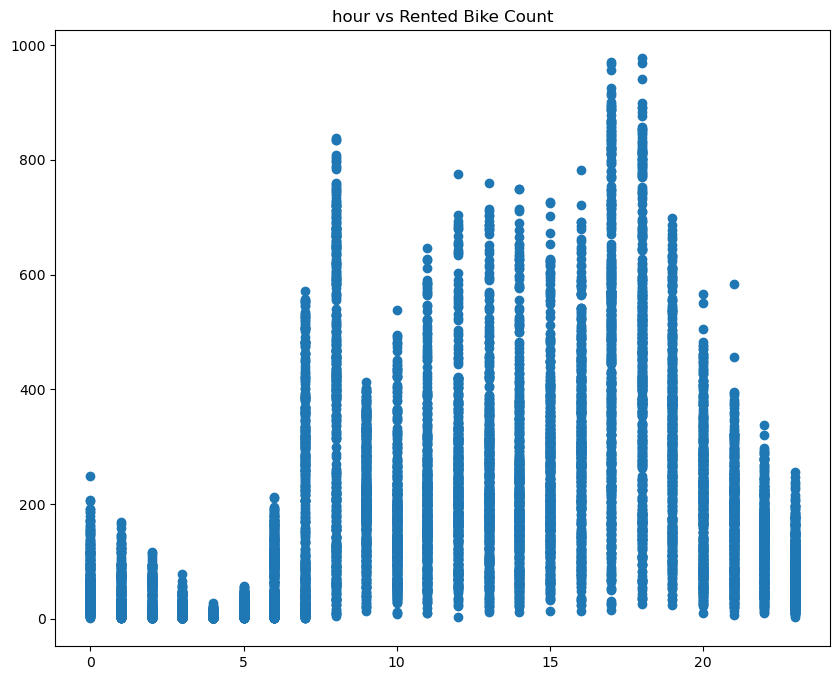

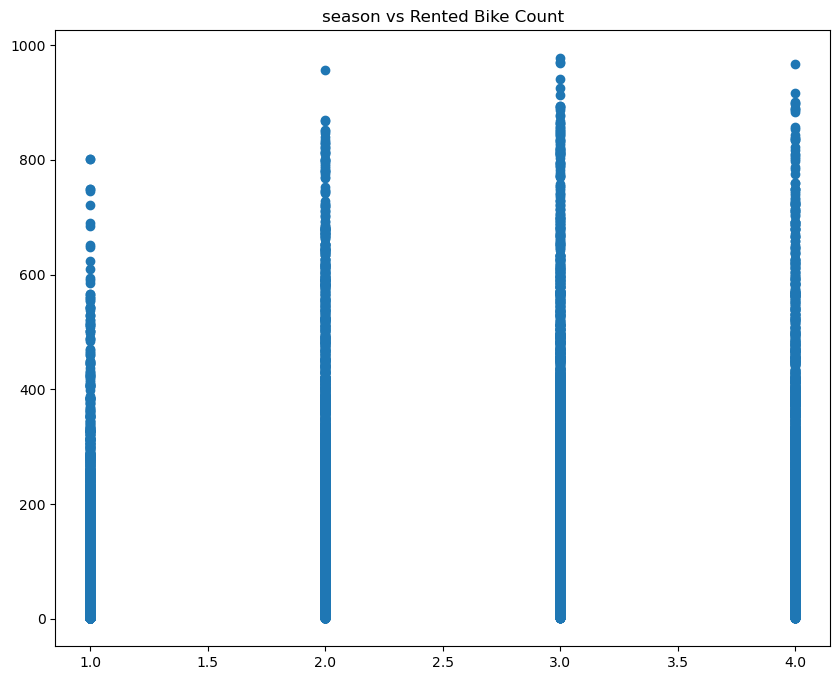

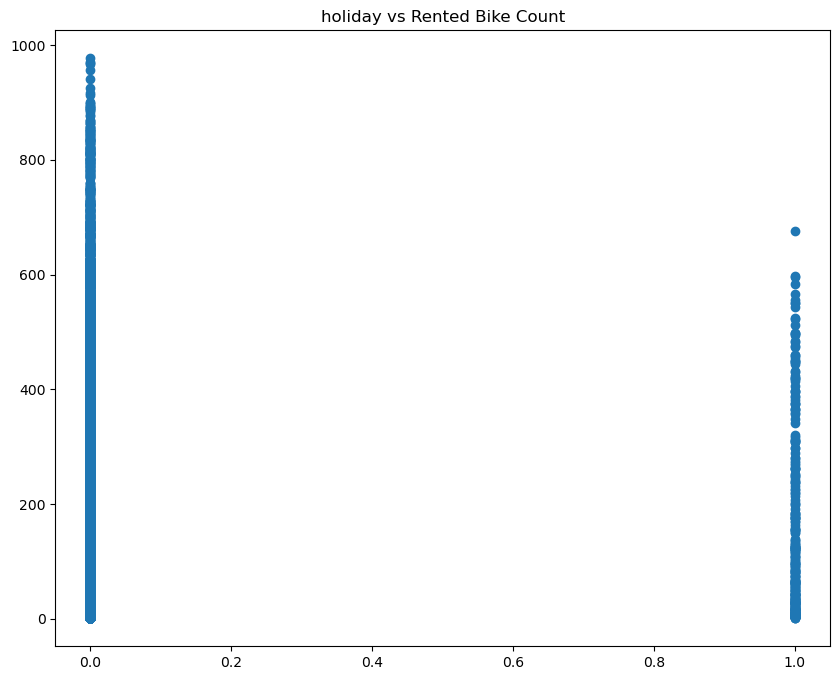

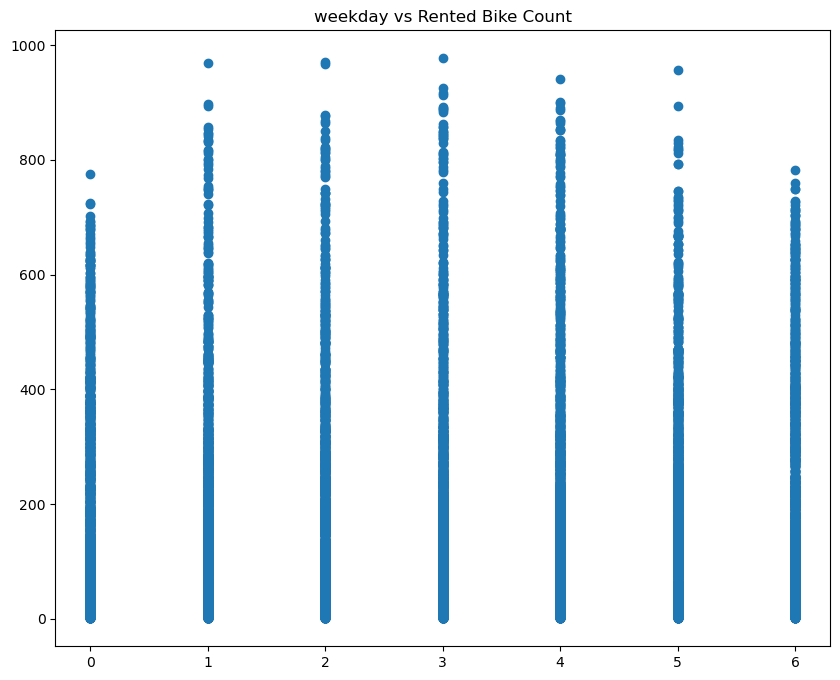

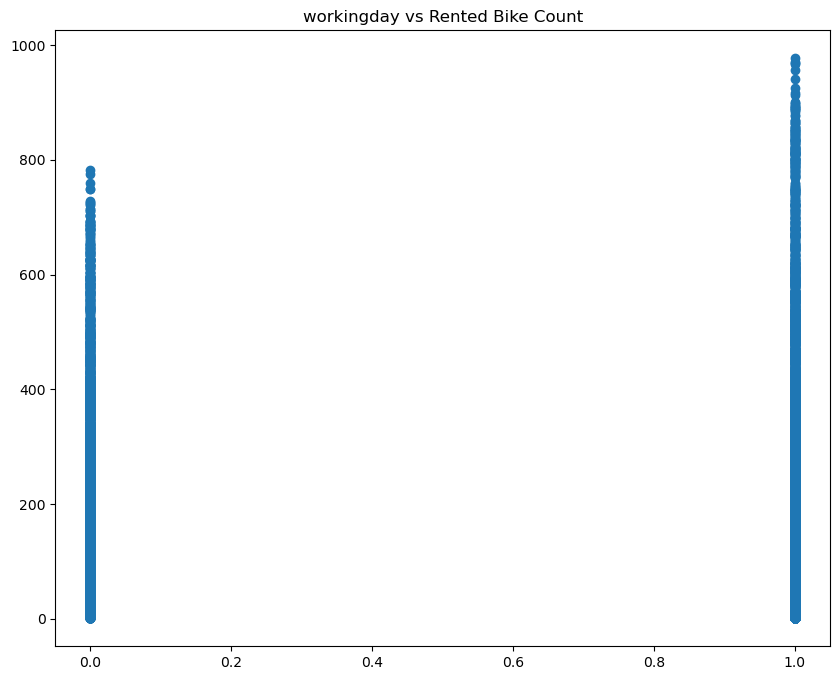

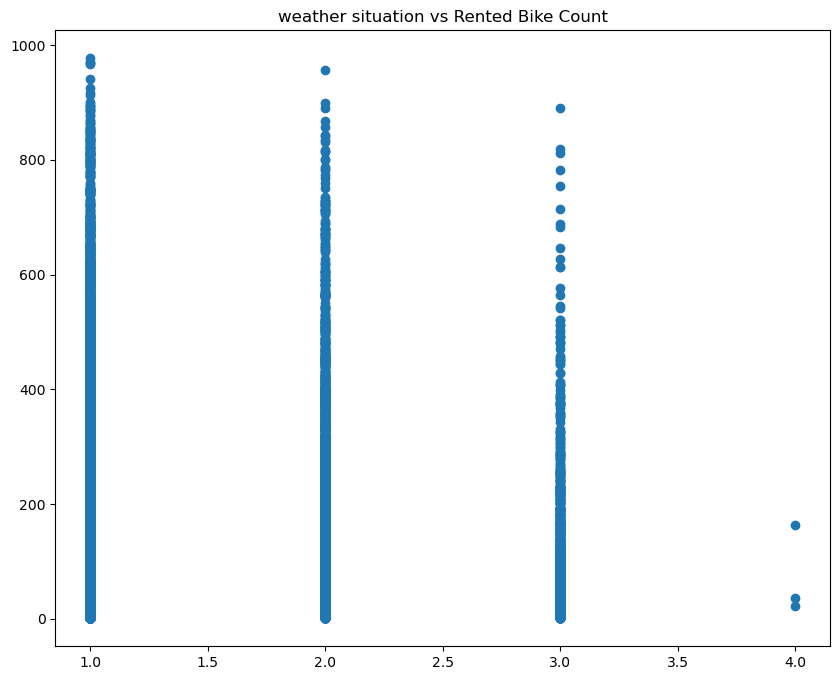

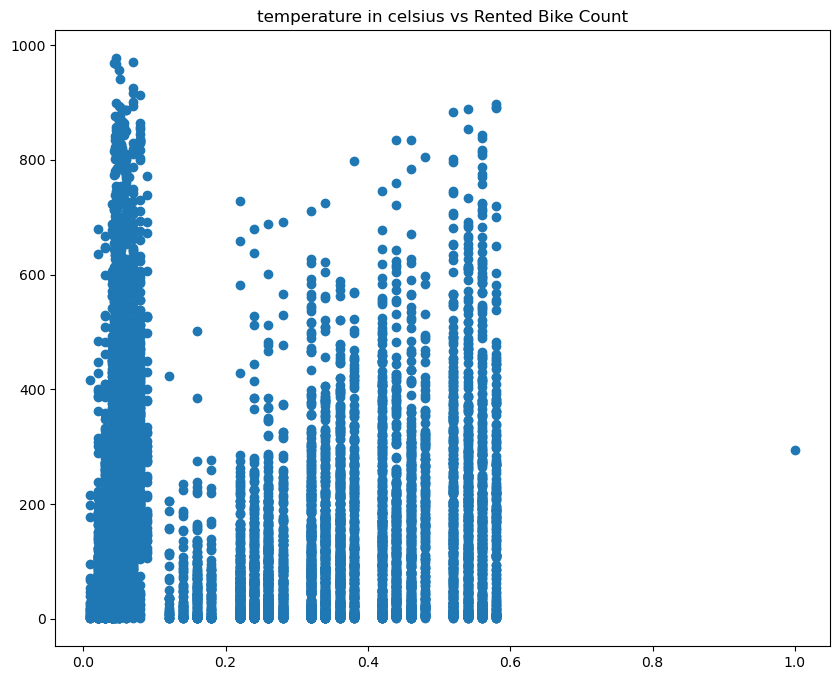

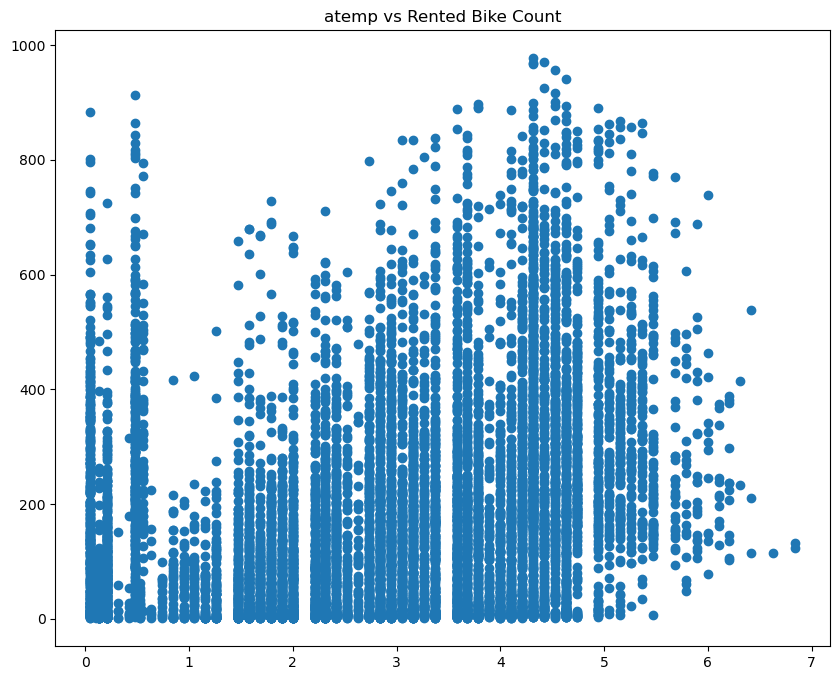

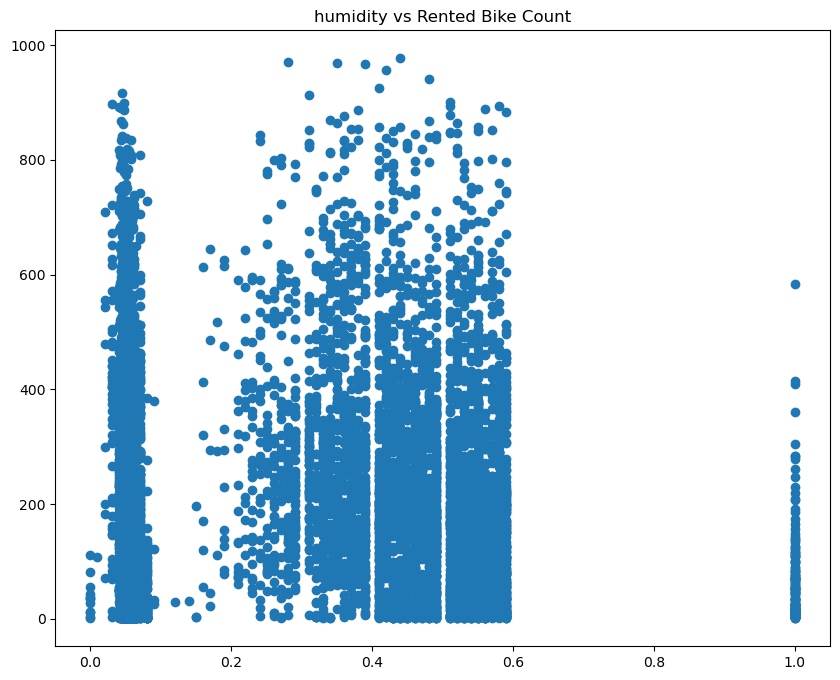

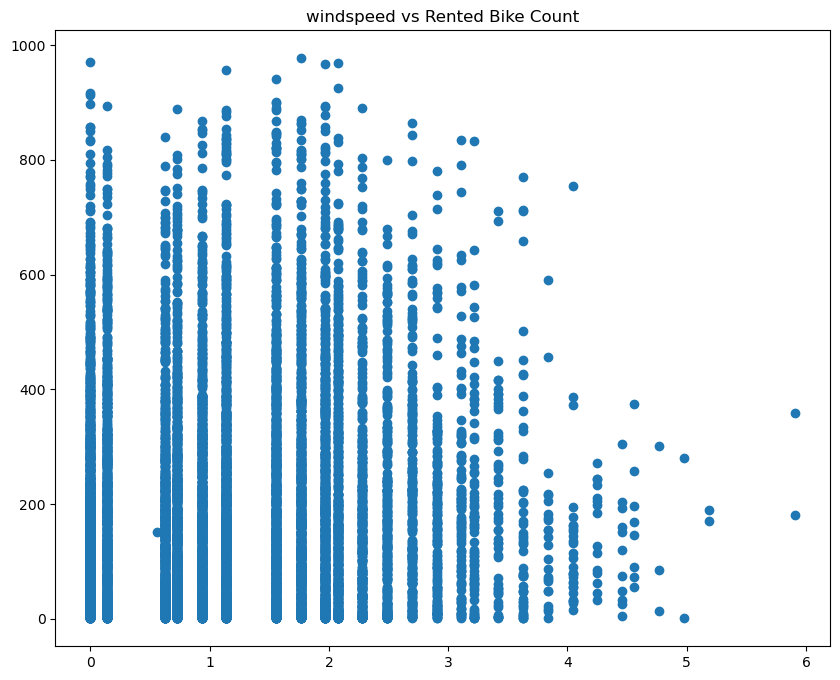

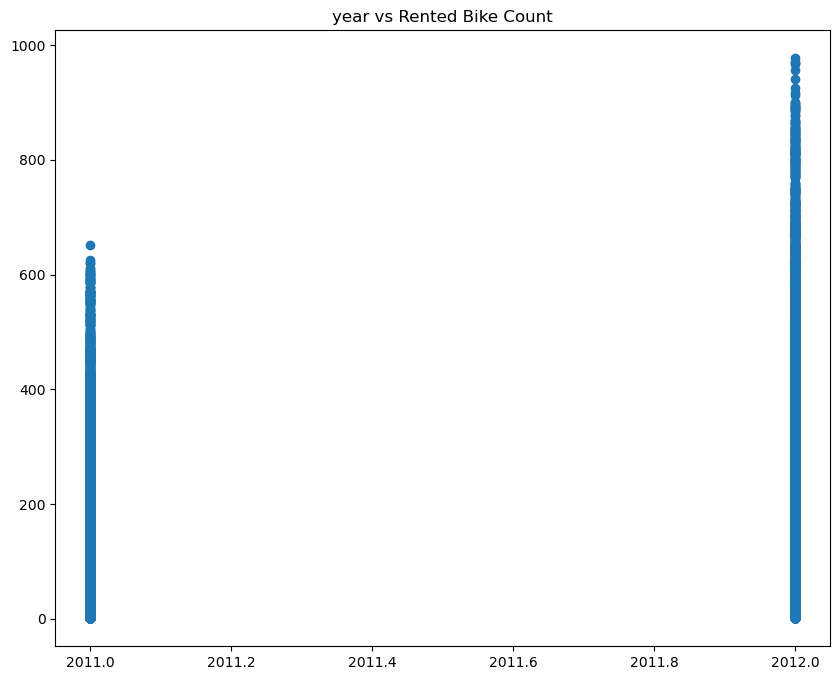

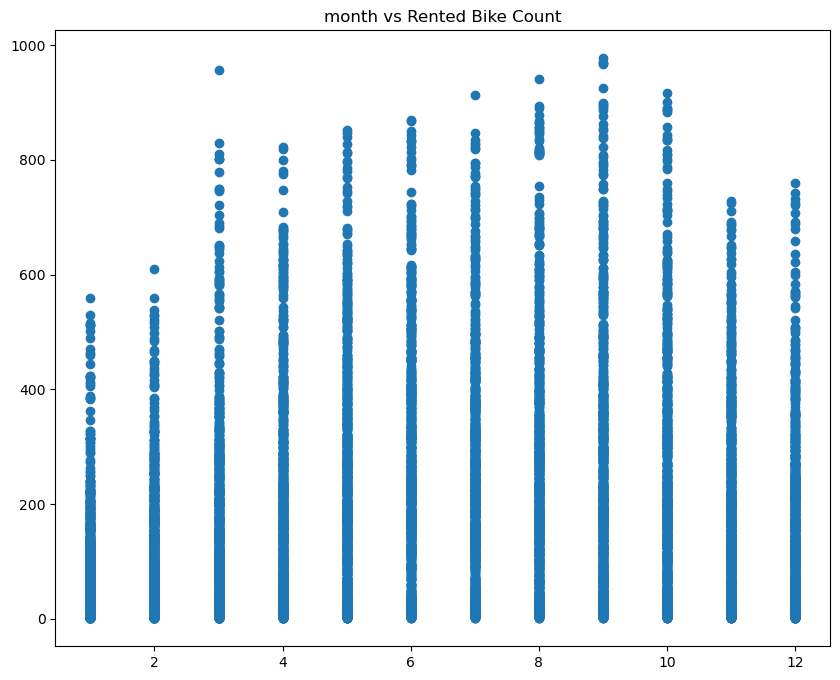

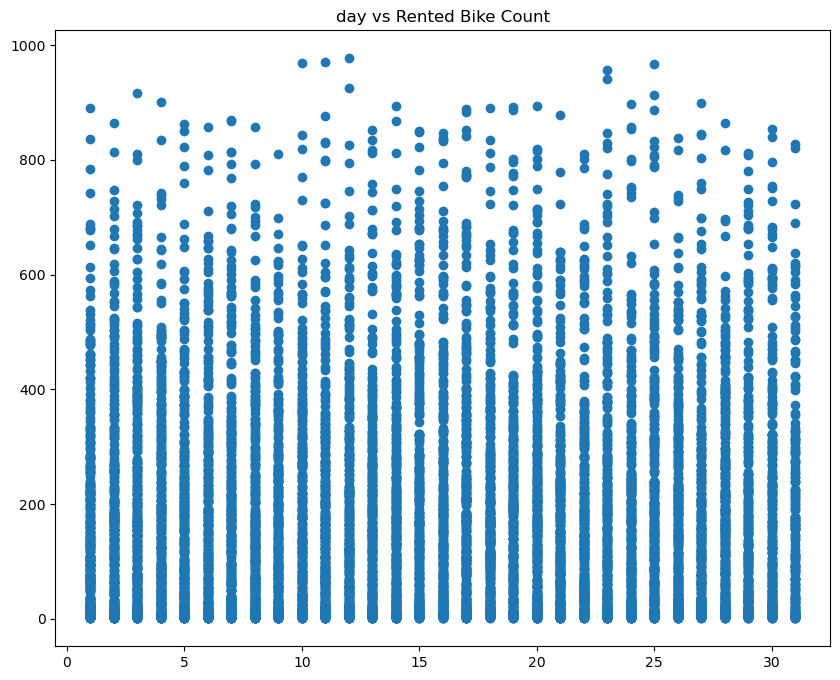

In [13]:
for col in df.columns:
    if col != "count":
        plt.figure(figsize=(10, 8))
        plt.scatter(df[col], df["count"])
        plt.title(f"{col} vs Rented Bike Count")
        plt.show()

### Ploting Distribution for each numerical feature count 

### task to complete apply transformation for all variables , and only for continues variables and test it

In [14]:
# # checking distribution of target
# fig = plt.figure(figsize=(9, 6))
# ax = fig.gca()

# # Obtaining histogram
# df['count'].hist(bins=50, ax=ax)

# # Show mean and median
# ax.axvline(df['count'].mean(), color='magenta',
#            linestyle='dashed', linewidth=2, label="mean")
# ax.axvline(df['count'].median(), color='cyan',
#            linestyle='dashed', linewidth=2, label="median")
# ax.set_title("Count Distribution")
# # Show the graph
# plt.legend()
# plt.show()

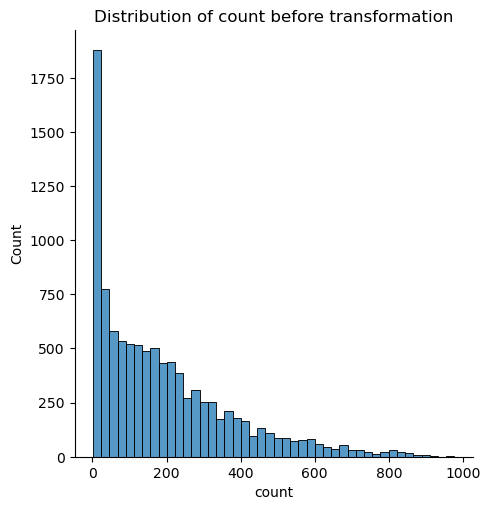

In [15]:
# applying box cox transformations (log)
from scipy.stats import boxcox
sns.displot(df["count"])
plt.title("Distribution of count before transformation")
plt.show()

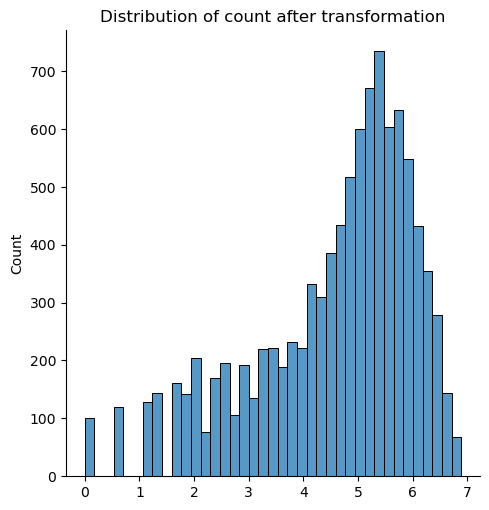

In [16]:
# applying box cox transformations (log)
from scipy.stats import boxcox
sns.displot(boxcox(df["count"], 0))
plt.title("Distribution of count after transformation")
plt.show()

### checking for outliers


<Axes: xlabel='count'>

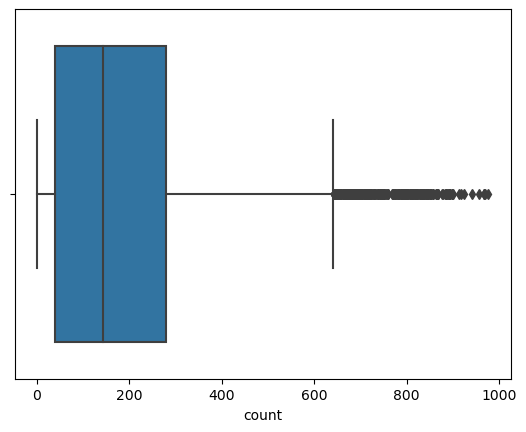

In [17]:

sns.boxplot(x=df['count'])

In [18]:
# Calculate the IQR for the 'count' column
Q1 = df['count'].quantile(0.25)
Q3 = df['count'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['count'] < lower_bound) | (df['count'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['count'].describe()

num_outliers, outliers_price_stats

(305,
 count    305.000000
 mean     748.344262
 std       80.347577
 min      642.000000
 25%      680.000000
 50%      729.000000
 75%      812.000000
 max      977.000000
 Name: count, dtype: float64)

In [19]:
# max value outliers
outliers.sort_values(by='count', ascending=False).head(15)

,hour,season,holiday,weekday,workingday,weather situation,temperature in celsius,atemp,humidity,windspeed,count,year,month,day
3849,18,3,0,3,1,1,0.045833,4.313889,0.440000,1.761806,977,2012,9,12
9422,17,3,0,2,1,1,0.070000,4.419444,0.280000,0.000000,970,2012,9,11
8706,18,3,0,1,1,1,0.043056,4.313889,0.350000,2.072917,968,2012,9,10
8326,17,4,0,2,1,1,0.045833,4.313889,0.390000,1.969444,967,2012,9,25
6562,17,2,0,5,1,2,0.050000,4.524306,0.420000,1.140278,957,2012,3,23
7688,18,3,0,4,1,1,0.051389,4.629861,0.480000,1.554861,941,2012,8,23
3306,17,3,0,3,1,1,0.070000,4.419444,0.410000,2.072917,925,2012,9,12
9309,17,4,0,3,1,1,0.070000,4.524306,0.045139,0.000000,917,2012,10,3
2555,17,3,0,3,1,1,0.080000,0.484028,0.310000,0.000000,913,2012,7,25
3631,17,4,0,4,1,1,0.070000,4.524306,0.510000,1.554861,901,2012,10,4


In [20]:
# min value outliers
outliers.sort_values(by='count', ascending=True).head(15)

,hour,season,holiday,weekday,workingday,weather situation,temperature in celsius,atemp,humidity,windspeed,count,year,month,day
779,18,4,0,5,1,1,0.440000,3.051389,0.380000,2.072917,642,2012,10,12
4044,12,2,0,6,0,1,0.045833,4.313889,0.360000,0.000000,642,2012,5,19
5800,18,3,0,3,1,2,0.052778,4.945139,0.043056,0.932639,643,2012,7,18
1933,17,2,0,5,1,1,0.070000,4.524306,0.540000,3.213194,643,2012,5,4
5894,8,2,0,3,1,2,0.070000,4.629861,0.054861,0.725694,643,2012,6,20
1914,13,2,0,6,0,1,0.050000,3.366667,0.220000,0.134722,643,2012,4,7
303,18,2,0,2,1,1,0.420000,2.945833,0.170000,0.622222,644,2012,3,27
5604,16,2,0,6,0,1,0.044444,4.313889,0.380000,1.761806,644,2012,6,2
9278,19,2,0,1,1,1,0.043056,4.313889,0.380000,2.902083,645,2012,6,4
762,8,3,0,2,1,1,0.051389,4.734722,0.043056,0.622222,646,2012,7,3


We cant perfectly categorize these as outliers because in 2012 we see that there is an increase also wee seen weather situation 1 
has more rentals

In [21]:
continues_var

['hour', 'temperature in celsius', 'atemp', 'humidity', 'windspeed', 'day']

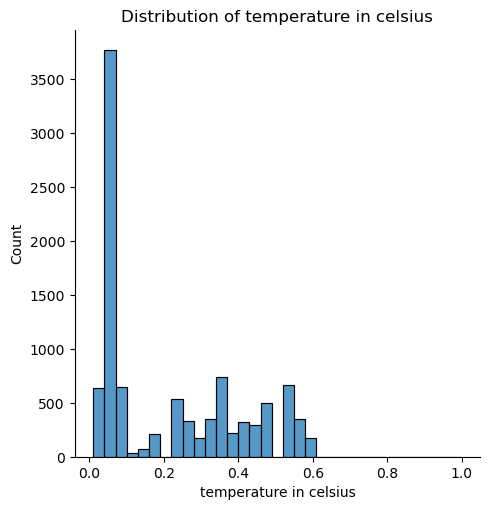

In [22]:
# applying box cox transformations (log)

sns.displot(df['temperature in celsius'])
plt.title("Distribution of temperature in celsius")
plt.show()

<Axes: xlabel='temperature in celsius'>

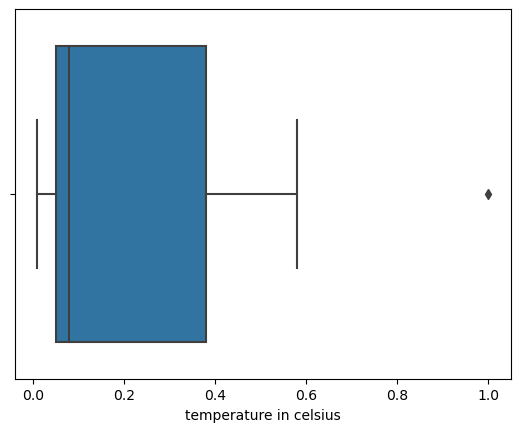

In [23]:
# box plot for temperature
sns.boxplot(x=df['temperature in celsius'])

In [24]:
# Calculate the IQR for the 'temperature' column
Q1 = df['temperature in celsius'].quantile(0.25)
Q3 = df['temperature in celsius'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['temperature in celsius'] < lower_bound) |
              (df['temperature in celsius'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['temperature in celsius'].describe()

num_outliers, outliers_price_stats

(1,
 count    1.0
 mean     1.0
 std      NaN
 min      1.0
 25%      1.0
 50%      1.0
 75%      1.0
 max      1.0
 Name: temperature in celsius, dtype: float64)

In [25]:
outliers

,hour,season,holiday,weekday,workingday,weather situation,temperature in celsius,atemp,humidity,windspeed,count,year,month,day
2076,16,3,0,6,0,1,1.0,5.997222,0.19,1.140278,294,2012,7,7


Not considering it as outliers because we can have 1 degress celcius as temperature

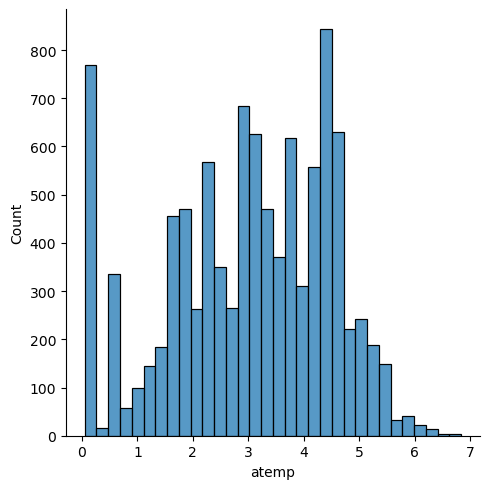

In [26]:
# Distribution of atemp
sns.displot(df['atemp'])

<Axes: xlabel='atemp'>

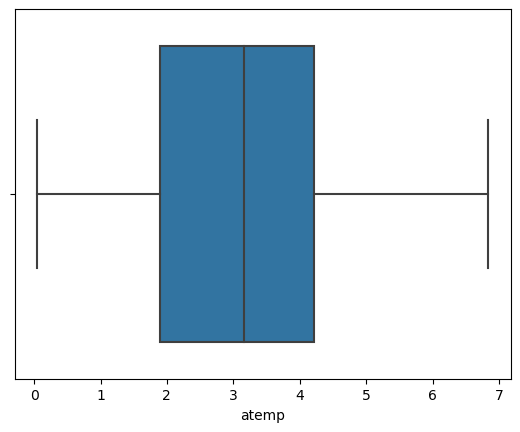

In [27]:
# box plot for a temp
sns.boxplot(x=df['atemp'])

No outliers

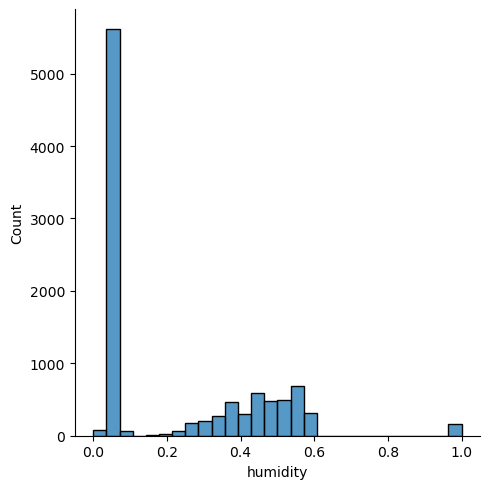

In [28]:
# Distribution of humidity
sns.displot(df['humidity'])

<Axes: xlabel='humidity'>

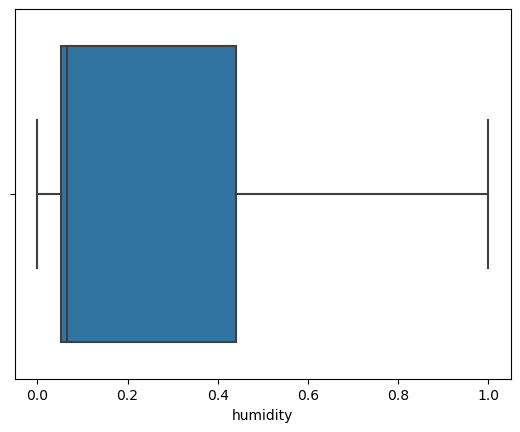

In [29]:
# box plot for a humidity
sns.boxplot(x=df['humidity'])

No outlier found in humidity

### Defining functions to get evaluation metric's scores and feature importance

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
def regression_results(actual_y, pred_y, X):
    '''This function takes actual and predicted value of target transform tem back and return scores of evaluation metrics'''

    # Reverse transforming the predicted output
    # y_true = np.expm1(actual_y)
    # y_pred = np.expm1(pred_y)
    y_true = actual_y
    y_pred = pred_y

    # Calculating regression metrics

    MAE = mean_absolute_error(y_true, y_pred)

    MSE = mean_squared_error(y_true, y_pred)

    RMSE = np.sqrt(MSE)

    r2 = r2_score(y_true, y_pred)

    adj_r2 = 1-(1-r2)*((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))

    return (round(MAE, 2), round(MSE, 2), round(RMSE, 2), round(r2, 2), round(adj_r2, 2))

In [32]:
def performance(model, X_train, X_test, y_train, y_test):
    '''This function takes model as input and return different evaluation metrics' score as dataframe'''

    # Doing prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calling the function regression_results
    train = regression_results(y_train, y_train_pred, X_train)
    test = regression_results(y_test, y_test_pred, X_test)

    # Storing the scores
    score = {'Metric': ['MAE', 'MSE', 'RMSE', 'r2', "adj_r2"],
             'Train Score': [train[0], train[1], train[2], train[3], train[4]],
             "Test Score": [test[0], test[1], test[2], test[3], test[4]]}

    # Create DataFrame
    df = pd.DataFrame(score)
    df.name = model
    return (df)

In [33]:
def feature_importance_linear(model, independent_var):
    '''This function takes instance of linear model as input and and return feature importance graph '''
    # Store the coefficients of the model into a dataframe
    coefs = pd.DataFrame(
        model.coef_,
        columns=['Coefficients'], index=independent_var)
    # Plot importance graph
    coefs.plot(kind='barh', figsize=(9, 7))
    plt.title('Model')
    plt.axvline(x=0, color='.5')
    plt.subplots_adjust(left=.3)

    plt.show()

In [34]:
def feature_importance_ensemble(model, independent_var):
    '''This function takes instance of ensemble model as input and returns the feature importance'''
    # Listing features
    features = independent_var
    # storing feature importance
    importances = model.feature_importances_
    indices = np.argsort(importances)
    # Plot the feature importance
    plt.title('Feature Importance')
    plt.barh(range(len(indices)),
             importances[indices], color='red', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')

    plt.show()

### Linear Regression model

In [35]:
X = df.drop("count", axis=1)
y = df["count"].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [37]:
print(X_train.shape)
X_train.head()

(8000, 13)


,hour,season,holiday,weekday,workingday,weather situation,temperature in celsius,atemp,humidity,windspeed,year,month,day
7389,22,2,0,3,1,1,0.052778,5.155556,0.052083,1.140278,2011,6,8
9275,21,3,0,2,1,3,0.044444,3.998611,0.061806,0.725694,2012,7,10
2995,14,2,0,6,0,3,0.520000,0.050000,0.061111,2.487500,2012,3,24
5316,6,1,0,5,1,1,0.380000,2.735417,0.056944,1.761806,2011,12,23
356,10,1,0,5,1,2,0.260000,1.683333,0.560000,1.761806,2012,12,28


In [38]:
print(X_test.shape)
X_train.head()

(2000, 13)


,hour,season,holiday,weekday,workingday,weather situation,temperature in celsius,atemp,humidity,windspeed,year,month,day
7389,22,2,0,3,1,1,0.052778,5.155556,0.052083,1.140278,2011,6,8
9275,21,3,0,2,1,3,0.044444,3.998611,0.061806,0.725694,2012,7,10
2995,14,2,0,6,0,3,0.520000,0.050000,0.061111,2.487500,2012,3,24
5316,6,1,0,5,1,1,0.380000,2.735417,0.056944,1.761806,2011,12,23
356,10,1,0,5,1,2,0.260000,1.683333,0.560000,1.761806,2012,12,28


In [39]:
y_train

array([176,  90, 223, ...,  78,   6, 343])

In [40]:
y_test

array([142, 227,  28, ...,  74,  72, 272])

In [41]:
# scaling test and train data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [42]:
X_train

array([[ 1.52339107, -0.46223431, -0.16135568, ..., -1.00601811,
        -0.1636691 , -0.87939261],
       [ 1.37763991,  0.44344154, -0.16135568, ...,  0.99401789,
         0.12840157, -0.65230241],
       [ 0.35738183, -0.46223431, -0.16135568, ...,  0.99401789,
        -1.03988109,  0.937329  ],
       ...,
       [-0.66287625, -0.46223431, -0.16135568, ...,  0.99401789,
        -0.1636691 ,  0.02896819],
       [-1.24588087, -0.46223431, -0.16135568, ...,  0.99401789,
        -0.45573976,  0.02896819],
       [ 0.35738183,  1.34911739, -0.16135568, ..., -1.00601811,
         1.58875488, -1.44711812]])

In [43]:
X_test = sc.transform(X_test)

In [44]:
X_test

array([[ 0.21163068,  1.34911739, -0.16135568, ..., -1.00601811,
         1.58875488,  0.3696035 ],
       [-0.37137394,  0.44344154, -0.16135568, ..., -1.00601811,
        -0.1636691 ,  0.8237839 ],
       [-1.10012972,  0.44344154, -0.16135568, ...,  0.99401789,
         0.71254289, -0.76584751],
       ...,
       [-1.39163202,  1.34911739, -0.16135568, ...,  0.99401789,
         1.58875488, -1.56066322],
       [ 1.37763991, -1.36791017, -0.16135568, ..., -1.00601811,
        -1.33195175, -0.65230241],
       [ 0.06587952, -0.46223431, -0.16135568, ...,  0.99401789,
        -0.45573976, -0.65230241]])

In [45]:
# importing regression model
from sklearn.linear_model import LinearRegression

In [46]:
# Fitting the model
reg = LinearRegression().fit(X_train, y_train)

In [47]:
performance(reg, X_train, X_test, y_train, y_test)

,Metric,Train Score,Test Score
0,MAE,113.40,111.24
1,MSE,22790.32,22504.28
2,RMSE,150.96,150.01
3,r2,0.31,0.33
4,adj_r2,0.31,0.32


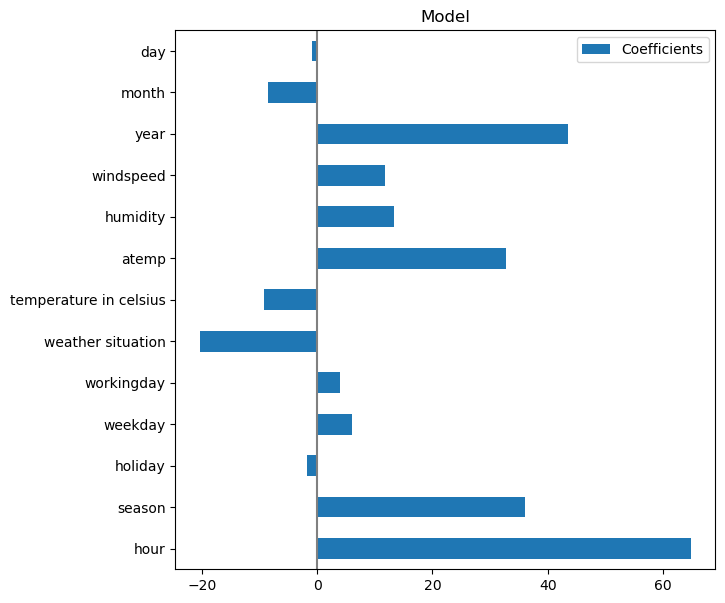

In [48]:
feature_importance_linear(reg, X.columns)

#### Applying Feature Selection to test the perfomance

<Axes: >

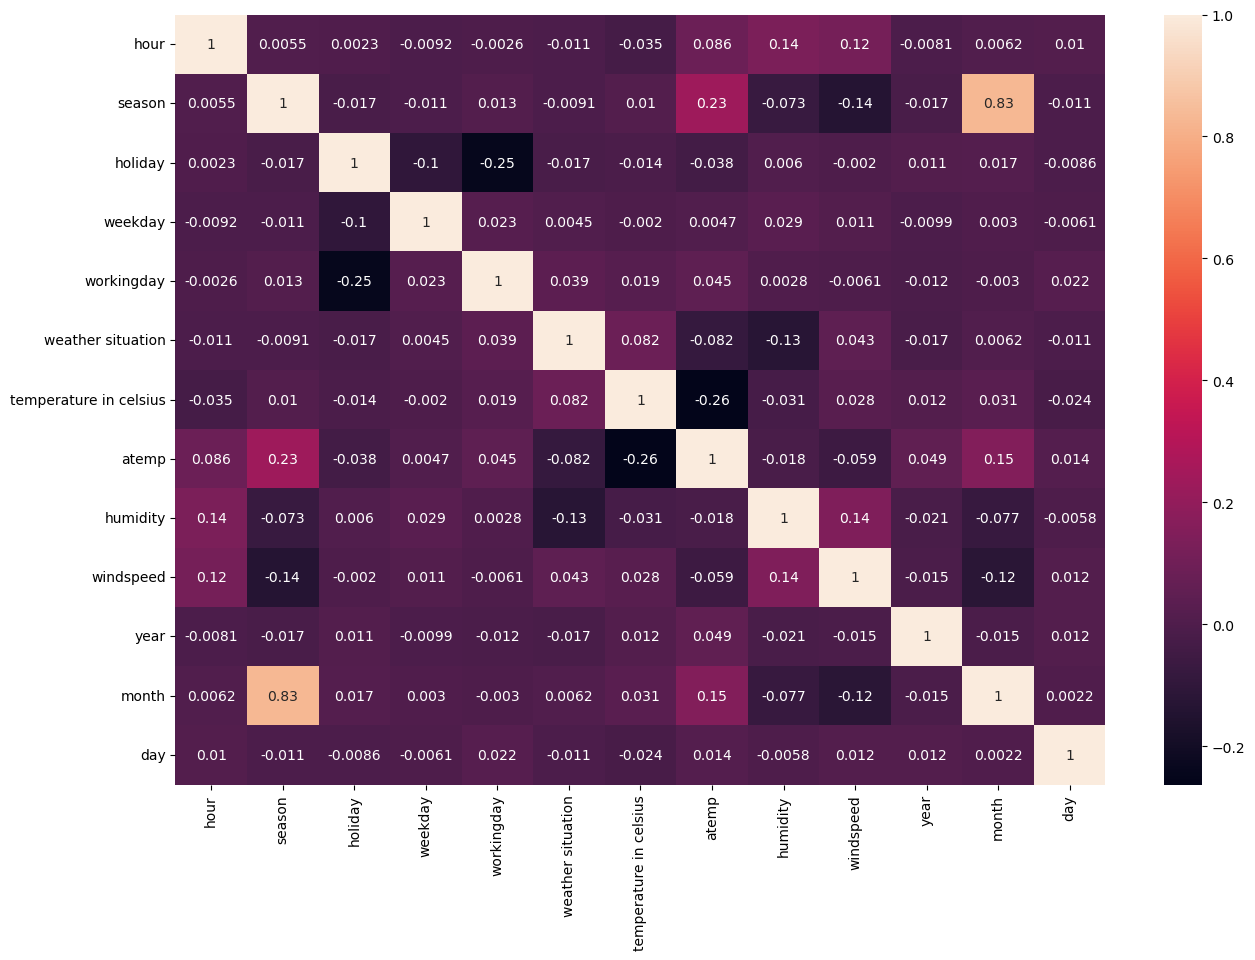

In [49]:
# finding highly correlate variables
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), annot=True)

In [50]:
corr_matrix = X.corr()

In [51]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.8:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

1


In [52]:
columns_to_drop

['month']

In [53]:
# dropping columns have more than .8 correlation
X.drop(columns_to_drop, axis=1, inplace=True)

In [54]:
# Using VIF to verify correlations
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(
    X.values, i) for i in range(X.shape[1])]

In [55]:
vif

,Feature,VIF
0,hour,3.962887
1,season,6.592121
2,holiday,1.106666
3,weekday,3.304844
4,workingday,3.404549
5,weather situation,6.078668
6,temperature in celsius,2.505482
7,atemp,5.976210
8,humidity,2.174841
9,windspeed,2.851634


In [56]:
# Set the threshold for VIF
vif_threshold = 5

# Identify features with high VIF values
high_vif_features = vif[vif['VIF'] > vif_threshold]['Feature'].values

# Remove features with high VIF values from the dataset
df_filtered_vif = X.drop(high_vif_features, axis=1)

df_filtered_vif

,hour,holiday,weekday,workingday,temperature in celsius,humidity,windspeed,day
0,15,0,3,1,0.520000,0.053472,0.000000,26
1,16,0,1,1,0.070000,0.540000,2.487500,25
2,23,0,3,1,0.540000,0.047222,0.932639,28
3,18,0,5,1,0.080000,0.590000,1.554861,10
4,9,0,4,1,0.340000,0.042361,2.280556,17
...,...,...,...,...,...,...,...,...
9995,7,0,2,1,0.340000,0.049306,0.725694,10
9996,0,0,0,0,0.044444,0.570000,0.622222,5
9997,12,0,5,1,0.045833,0.270000,1.969444,3
9998,20,0,6,0,0.047222,0.410000,0.622222,19


In [57]:
# Preparing Train, Test Data
X_train, X_test, y_train, y_test = train_test_split(
    df_filtered_vif, y, test_size=0.2, random_state=0)

In [58]:
X_train.head()

,hour,holiday,weekday,workingday,temperature in celsius,humidity,windspeed,day
7389,22,0,3,1,0.052778,0.052083,1.140278,8
9275,21,0,2,1,0.044444,0.061806,0.725694,10
2995,14,0,6,0,0.520000,0.061111,2.487500,24
5316,6,0,5,1,0.380000,0.056944,1.761806,23
356,10,0,5,1,0.260000,0.560000,1.761806,28


In [59]:
X_train.shape

(8000, 8)

In [60]:
y_train

array([176,  90, 223, ...,  78,   6, 343])

In [61]:
X_test.head()

,hour,holiday,weekday,workingday,temperature in celsius,humidity,windspeed,day
9394,13,0,1,1,0.340000,0.490000,2.280556,19
898,9,0,4,1,0.051389,0.070000,0.932639,23
2398,4,0,0,0,0.520000,0.053472,1.761806,9
5906,6,0,6,0,0.160000,0.064583,1.140278,21
2343,6,1,1,0,0.240000,0.520000,2.902083,20


In [62]:
X_test.shape

(2000, 8)

In [63]:
y_test

array([142, 227,  28, ...,  74,  72, 272])

In [64]:
# scaling test and train data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [65]:
X_train

array([[ 1.52339107, -0.16135568, -0.00771487, ..., -0.79819679,
        -0.0733158 , -0.87939261],
       [ 1.37763991, -0.16135568, -0.50544851, ..., -0.75514703,
        -0.52226862, -0.65230241],
       [ 0.35738183, -0.16135568,  1.48548606, ..., -0.75822202,
         1.38559287,  0.937329  ],
       ...,
       [-0.66287625, -0.16135568,  1.48548606, ..., -0.81972167,
        -1.1622332 ,  0.02896819],
       [-1.24588087, -0.16135568, -0.00771487, ..., -0.75822202,
        -0.52226862,  0.02896819],
       [ 0.35738183, -0.16135568,  1.48548606, ...,  1.00804789,
        -1.30812407, -1.44711812]])

In [66]:
X_test = sc.transform(X_test)
X_test

array([[ 0.21163068, -0.16135568, -1.00318216, ...,  1.14088713,
         1.16149247,  0.3696035 ],
       [-0.37137394, -0.16135568,  0.49001877, ..., -0.71886224,
        -0.29816822,  0.8237839 ],
       [-1.10012972, -0.16135568, -1.5009158 , ..., -0.79204682,
         0.59973743, -0.76584751],
       ...,
       [-1.39163202, -0.16135568, -1.5009158 , ..., -0.761297  ,
        -1.30812407, -1.56066322],
       [ 1.37763991, -0.16135568,  0.49001877, ...,  0.69808966,
        -1.30812407, -0.65230241],
       [ 0.06587952, -0.16135568,  0.49001877, ...,  1.09660738,
         1.83454569, -0.65230241]])

In [67]:
# importing regression model
reg = LinearRegression().fit(X_train, y_train)

In [68]:
performance(reg, X_train, X_test, y_train, y_test)

,Metric,Train Score,Test Score
0,MAE,124.45,124.60
1,MSE,27583.72,27672.97
2,RMSE,166.08,166.35
3,r2,0.17,0.17
4,adj_r2,0.17,0.17


R2 score is getting worsen.So we missed some important details. We can try with other non linear models

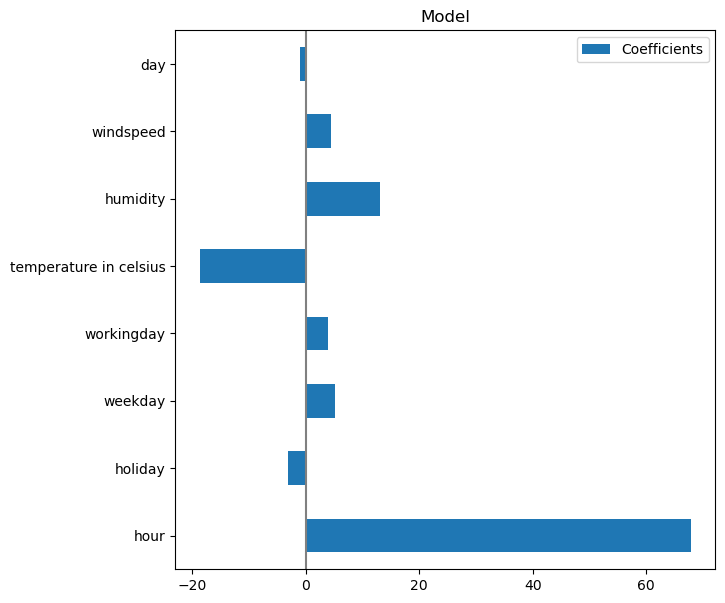

In [69]:
# finding feature importance with linear regression after removing correlated values
feature_importance_linear(reg, df_filtered_vif.columns)

# Random Forest Regressor

In [2]:

from sklearn.ensemble import RandomForestRegressor

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [74]:
print(X_train.shape)
X_train.head()

(8000, 12)


,hour,season,holiday,weekday,workingday,weather situation,temperature in celsius,atemp,humidity,windspeed,year,day
7389,22,2,0,3,1,1,0.052778,5.155556,0.052083,1.140278,2011,8
9275,21,3,0,2,1,3,0.044444,3.998611,0.061806,0.725694,2012,10
2995,14,2,0,6,0,3,0.520000,0.050000,0.061111,2.487500,2012,24
5316,6,1,0,5,1,1,0.380000,2.735417,0.056944,1.761806,2011,23
356,10,1,0,5,1,2,0.260000,1.683333,0.560000,1.761806,2012,28


In [75]:
y_train

array([176,  90, 223, ...,  78,   6, 343])

In [76]:
print(X_test.shape)
X_test.head()

(2000, 12)


,hour,season,holiday,weekday,workingday,weather situation,temperature in celsius,atemp,humidity,windspeed,year,day
9394,13,4,0,1,1,1,0.340000,0.210417,0.490000,2.280556,2011,19
898,9,3,0,4,1,2,0.051389,0.484028,0.070000,0.932639,2011,23
2398,4,3,0,0,0,1,0.520000,0.050000,0.053472,1.761806,2012,9
5906,6,1,0,6,0,3,0.160000,1.157639,0.064583,1.140278,2012,21
2343,6,1,1,1,0,1,0.240000,0.136806,0.520000,2.902083,2012,20


In [77]:
# RandomForest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

In [79]:
print("Scores of Random Forest")
performance(model_rf, X_train, X_test, y_train, y_test)

Scores of Random Forest


/tmp/ipykernel_8331/3540170249.py:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.name = model


,Metric,Train Score,Test Score
0,MAE,11.45,31.19
1,MSE,358.62,2699.76
2,RMSE,18.94,51.96
3,r2,0.99,0.92
4,adj_r2,0.99,0.92


#### Random Forest cross validation

In [80]:

# Number of trees
n_estimators = [50, 80, 100]

# Maximum depth of trees
max_depth = [4, 6, 8]

# Minimum number of samples required to split a node
min_samples_split = [50, 100, 150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40, 50]

# HYperparameter Grid
param_dict = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [81]:

from sklearn.model_selection import RandomizedSearchCV

# Create an instance of the RandomForestClassifier
rf_model = RandomForestRegressor()

# Grid search
rf_grid = RandomizedSearchCV(estimator=rf_model, scoring="neg_mean_squared_error",
                             param_distributions=param_dict,
                             cv=5, verbose=2)
# Fitting model
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.9s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.8s
[CV] END max_dept

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   scoring='neg_mean_squared_error', verbose=2)

In [82]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=50, min_samples_split=150,
                      n_estimators=50)

In [83]:
rf_optimal_model = rf_grid.best_estimator_

In [85]:

rf_grid.best_params_

{'n_estimators': 50,
 'min_samples_split': 150,
 'min_samples_leaf': 50,
 'max_depth': 8}

In [86]:

# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)

# Get the probabilities on train and test
y_pred_train_rf = rf_optimal_model.predict(X_train)
y_pred_test_rf = rf_optimal_model.predict(X_test)

In [88]:

test_class_preds

array([190.80983913, 181.84865579,   8.95761821, ...,  54.66710893,
        51.90800646, 266.60455321])

In [89]:
print("random forest best score", rf_grid.best_score_)

random forest best score -8684.573238329944


In [92]:
print("performance of Random Forest after cross validation and hyperparameter tuning")
performance(rf_optimal_model, X_train, X_test, y_train, y_test)

performance of Random Forest after cross validation and hyperparameter tuning


/tmp/ipykernel_8331/3540170249.py:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.name = model


,Metric,Train Score,Test Score
0,MAE,57.79,56.53
1,MSE,7776.17,7544.89
2,RMSE,88.18,86.86
3,r2,0.77,0.77
4,adj_r2,0.77,0.77


Random Forest-Feature Importance


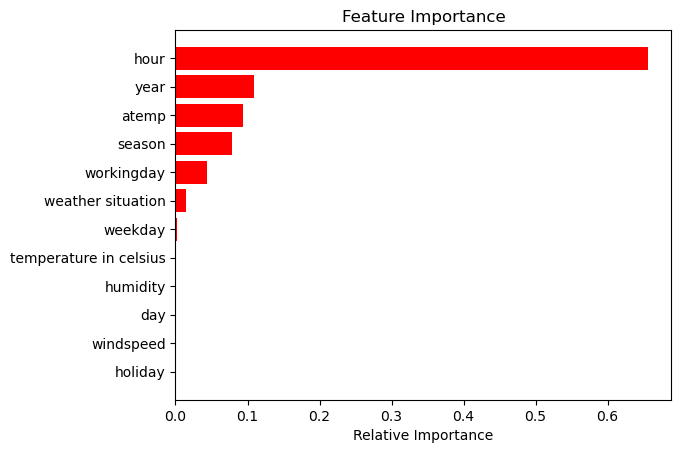

In [95]:

print("Random Forest-Feature Importance")
feature_importance_ensemble(rf_optimal_model, X_train.columns)

In [99]:
# so we can filter out important columns and use it for predictions in
X = df[["hour", "year", "atemp", "season", "workingday", "weekday"]]
y = df["count"]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [102]:
rf_model = RandomForestRegressor(
    n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=8)

In [104]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=50, min_samples_split=150,
                      n_estimators=50)

In [105]:
# Making predictions on train and test data using best random forest model

train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

# Get the probabilities on train and test
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [106]:
print("performance of Random Forest after selected")
performance(rf_model, X_train, X_test, y_train, y_test)

performance of Random Forest after selected


/tmp/ipykernel_8331/3540170249.py:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.name = model


,Metric,Train Score,Test Score
0,MAE,57.06,56.14
1,MSE,7581.61,7473.68
2,RMSE,87.07,86.45
3,r2,0.77,0.78
4,adj_r2,0.77,0.78


### Trying to predict competition dataset

In [109]:
ls

analysis_report_temp.ipynb  EDA.ipynb                  preprocessed_df.csv
data/                       Feature_engineering.ipynb


In [137]:
# loading the data
test_df = pd.read_csv("data/Test.csv")

In [138]:
test_df.head()

,Id,datetime,yr,mnth,hr,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1975,28/03/2011,0,3,2,2,0,1,1,1,0.22,1.578472,0.440000,1.140278
1,6013,13/09/2011,0,9,2,3,0,2,1,1,0.06,3.998611,0.054167,0.000000
2,14219,20/08/2012,1,8,15,3,0,1,1,1,0.05,4.629861,0.540000,1.761806
3,10199,06/03/2012,1,3,0,1,0,2,1,1,0.22,1.472917,0.370000,2.072917
4,7446,11/11/2011,0,11,20,4,1,5,0,1,0.32,2.209722,0.390000,0.134722


In [147]:
test_df.shape

(7379, 17)

In [148]:
test_df.rename(columns={'hr': 'hour', "weathersit": "weather situation",
                        "hum": "humidity", "temp": "temperature in celsius"}, inplace=True)

In [149]:
# treating date time column
test_df["datetime"] = pd.to_datetime(test_df["datetime"], format='%d/%m/%Y')

In [150]:
# Converting datetime column to year,month,day
test_df['year'] = pd.DatetimeIndex(test_df["datetime"]).year
test_df['month'] = pd.DatetimeIndex(test_df["datetime"]).month
test_df['day'] = pd.DatetimeIndex(test_df["datetime"]).day

In [151]:
id_df = test_df[["Id"]]

In [152]:
# Selecting the important columns
test_df = test_df[X_train.columns]

In [153]:
# Trying to predict the competition test data
test_y_pred = rf_model.predict(test_df)

In [154]:
test_y_pred

array([  8.10214101,   9.00411286, 262.91436323, ..., 106.78240604,
       199.01056644, 576.89053738])

In [155]:
id_df["Expected"] = test_y_pred

/tmp/ipykernel_8331/898605033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_df["Expected"] = test_y_pred


In [158]:
id_df.to_csv("predicted_result_rf.csv", index=False)

In [159]:
id_df.shape

(7379, 2)